# 밑바닥부터 시작하는 딥러닝 1
***

대부분의 딥러닝 네트워크는 **입력층, 은닉층, 출력층**의 구조를 가진다.

입력 신호로부터 전달되는 정보의 총합을 출력 신호로 변환할 때 **활성화 함수(acivation function)**이 사용된다. 활성화 함수는 임곗값(threshold)을 경계로 출력값이 바뀐다.

***

### Sigmoid
<br>
<br>

- 시그모이드의 수식은 아래와 같다.
<center>$h(x) = {1\over 1  +  exp(-x)}$<center>

- 위 수식의 결과는 0과 1 사이의 값을 가진다.


In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
def step_function(x) :
    if x > 0 :
        return 1
    else :
        return 0

In [4]:
step_function(3)

1

In [7]:
# step_function(np.array(3, 2, 4))

위 코드는 오류가 발생한다.

In [21]:
def step_function(x) :
    y = x > 0
    
    return y.astype(np.int)

numpy의 int 변환을 이용해야 배열 안의 요소들이 정수 형태로 반환된다.

In [24]:
step_function(np.array([3, 4, -3]))

array([1, 1, 0])

#### 계단 함수 구현

In [32]:
def step_function(x) :
    result = np.array(x > 0, dtype = np.int)
    return result

In [28]:
x = np.arange(-10, 10, 0.1)

In [33]:
y = step_function(x)

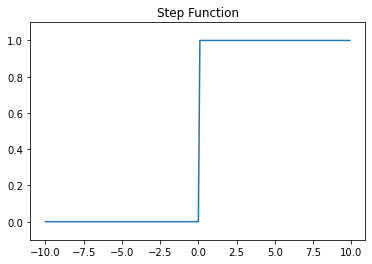

In [36]:
plt.title('Step Function')
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

#### 시그모이드 함수 구현

In [38]:
def sigmoid(x) :
    
    return 1 / (1 + np.exp(-x))

In [39]:
x = np.array([1, -4, 5, 10])

In [40]:
sigmoid(x)

array([0.73105858, 0.01798621, 0.99330715, 0.9999546 ])

In [41]:
x = np.arange(-5, 5, 0.1)

In [42]:
y = sigmoid(x)

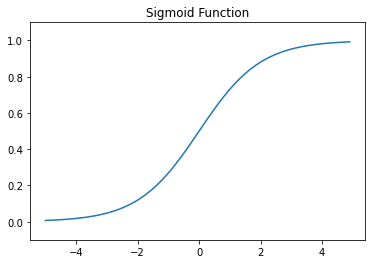

In [46]:
plt.title('Sigmoid Function')
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

#### 시그모이드와 계단 함수 비교
<br>
<br>

- 시각적으로도 차이가 있지만 가장 큰 차이는 특정 임계값(0)을 기준으로 계단 함수는 출력이 갑자기 바뀌지만 시그모이드는 그렇지 않다.
- 계단 함수는 0 혹은 1 중 하나의 값만 반환하지만 시그모이드는 실수 값을 반환한다.
<br>

***
### 비선형 함수
<br>

- 계단 함수와 시그모이드는 모두 비선형 함수로 신경망에서는 선형 함수를 사용하면 deep한 네트워크를 쌓을 수 없어서 비선형 함수가 사용된다.
- 선형 함수를 활성화 함수로 사용할 경우 결국 $y(x) = ax$가 되기 때문이다.

### ReLU 함수

- ReLU는 0 이하의 입력에는 0을 0을 초과하는 입력 값에는 그 값 자체를 반환한다.

In [47]:
def ReLU(x) :
    
    return np.maximum(0, x)

In [49]:
ReLU(-3)

0

In [50]:
ReLU(6)

6

### 얕은 신경망 구현

In [55]:
# 항등함수
def identity_function(x) :
    
    return x

In [53]:
def init_network() :
    
    network = {}
    
    network['W1'] = np.array([[0.2, 0.1, 0.4], [0.5, 0.3, 0.6]])
    network['b1'] = c
    network['W2'] = np.array([[0.1, 0.4], [0.8, 0.2], [0.9, 0.5]])
    network['b2'] = np.array([0.2, 0.6])
    network['W3'] = np.array([[0.4, 0.6], [0.5, 0.3]])
    network['b3'] = np.array([0.8, 0.7])
    
    return network

In [56]:
def forward(network, x) :
    
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    s1 = sigmoid(a1)
    
    a2 = np.dot(s1, W2) + b2
    s2 = sigmoid(a2)
    
    a3 = np.dot(s2, W3) + b3
    y = identity_function(a3)
    
    return y

In [58]:
network = init_network()
x = np.array([0.9, 0.2])
y = forward(network, x)

In [59]:
print(y)

[1.51010133 1.41169958]


위에서 출력층으로 함수를 따로 지정해주지 않고 항등함수를 사용했는데 일반적인 ML문제인 분류(classification)과 회귀(regression)를 위해서는 별도로 함수를 지정해야 한다.
- 분류 : softmax, sigmoid
- 회귀 : 항등함수

항등 함수(identity function)는 입력을 그대로 출력한다. 반면 소프트맥스 함수의 수식은 아래와 같다.

<center> $y_{k} = {exp(a_{k})\over \sum_{i = 1}^n {exp(a_{i})}}$<center>
    
n은 출력층의 뉴런 수, $y_{k}$는 그 중 k번째 출력

In [3]:
a = np.array([0.3, 3.8, 1.2])

In [4]:
exp_a = np.exp(a)

In [5]:
exp_a

array([ 1.34985881, 44.70118449,  3.32011692])

In [6]:
sum_exp_a = np.sum(exp_a)

In [7]:
sum_exp_a

49.371160223613366

In [8]:
y = exp_a / sum_exp_a

In [9]:
y

array([0.02734104, 0.90541086, 0.0672481 ])

In [10]:
def softmax_function(x) :
    
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

소프트맥스 함수는 지수 함수를 사용하기 때문에 오버플로(overflow) 현상이 발생한다.

In [11]:
a = np.array([1010, 2000, 99999])

In [12]:
np.exp(a) / np.sum(np.exp(a))

array([nan, nan, nan])

overflow 발생

In [13]:
c = np.max(a)

In [14]:
c

99999

In [15]:
a - c

array([-98989, -97999,      0])

In [16]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([0., 0., 1.])